<a href="https://colab.research.google.com/github/Sairam901423/MACHINE-LEARNING-PROJECT/blob/main/pr_7.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

=== First Five Rows of the Dataset ===
   sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)  \
0                5.1               3.5                1.4               0.2   
1                4.9               3.0                1.4               0.2   
2                4.7               3.2                1.3               0.2   
3                4.6               3.1                1.5               0.2   
4                5.0               3.6                1.4               0.2   

  species  
0  setosa  
1  setosa  
2  setosa  
3  setosa  
4  setosa  

=== Statistical Summary ===
       sepal length (cm)  sepal width (cm)  petal length (cm)  \
count         150.000000        150.000000         150.000000   
mean            5.843333          3.057333           3.758000   
std             0.828066          0.435866           1.765298   
min             4.300000          2.000000           1.000000   
25%             5.100000          2.800000           1.60000

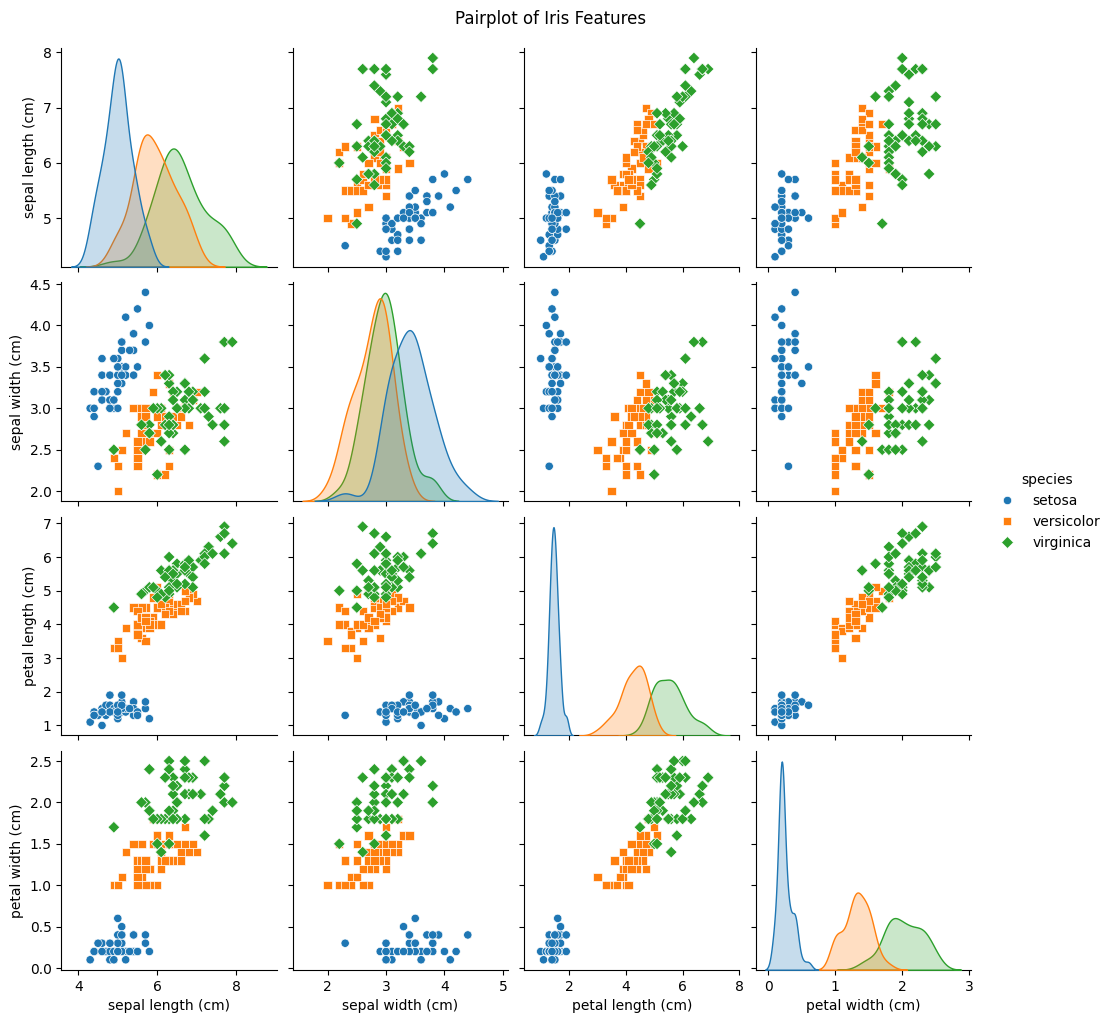


=== Accuracy of SVM Classifier: 1.00 ===


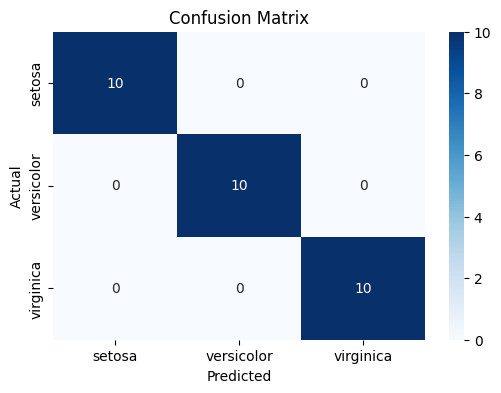


=== Classification Report ===
              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        10
  versicolor       1.00      1.00      1.00        10
   virginica       1.00      1.00      1.00        10

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30



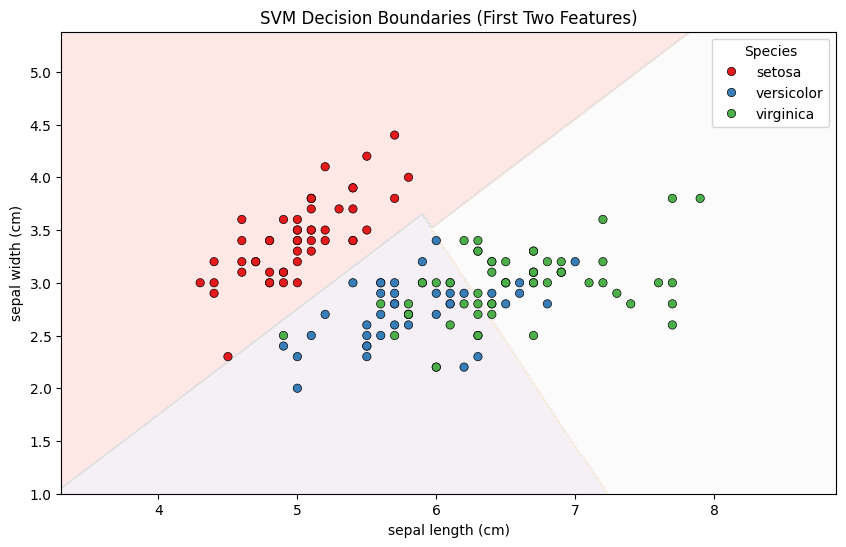

=== Iris Flower Classification Completed ===


In [ ]:
# iris_svm_classification.py

"""
Iris Flower Classification using Support Vector Machine (SVM)

This script performs the following steps:
1. Loads the Iris dataset.
2. Performs Exploratory Data Analysis (EDA).
3. Preprocesses the data (encoding, splitting, scaling).
4. Trains an SVM classifier.
5. Evaluates the model's performance.
6. Visualizes the results, including decision boundaries.
"""

# ============================
# 1. Importing Libraries
# ============================
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.svm import SVC
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

import warnings
warnings.filterwarnings('ignore')  # Suppress warnings for cleaner output

# ============================
# 2. Loading the Iris Dataset
# ============================

# Load the Iris dataset from scikit-learn
iris = load_iris()
X = iris.data  # Features: Sepal length, Sepal width, Petal length, Petal width
y = iris.target  # Target labels: 0 = setosa, 1 = versicolor, 2 = virginica

# Create a pandas DataFrame for easier data manipulation
df = pd.DataFrame(data=X, columns=iris.feature_names)
df['species'] = y
df['species'] = df['species'].map({0: 'setosa', 1: 'versicolor', 2: 'virginica'})

# ============================
# 3. Exploratory Data Analysis (EDA)
# ============================

print("=== First Five Rows of the Dataset ===")
print(df.head())

print("\n=== Statistical Summary ===")
print(df.describe())

# Pairplot to visualize relationships between features
sns.pairplot(df, hue='species', markers=["o", "s", "D"])
plt.suptitle("Pairplot of Iris Features", y=1.02)
plt.show()

# ============================
# 4. Data Preprocessing
# ============================

# a. Feature and Target Separation
X = df.drop('species', axis=1)
y = df['species']

# b. Encoding the Target Variable
le = LabelEncoder()
y_encoded = le.fit_transform(y)  # setosa:0, versicolor:1, virginica:2

# c. Splitting the Dataset into Training and Testing Sets
X_train, X_test, y_train, y_test = train_test_split(
    X, y_encoded, test_size=0.2, random_state=42, stratify=y_encoded
)

# d. Feature Scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# ============================
# 5. Building the Support Vector Machine (SVM) Classifier
# ============================

# Initialize the SVM model with a linear kernel
svm_classifier = SVC(kernel='linear', random_state=42)

# Train the model
svm_classifier.fit(X_train_scaled, y_train)

# Predict on the test set
y_pred = svm_classifier.predict(X_test_scaled)

# ============================
# 6. Model Evaluation
# ============================

# a. Accuracy Score
accuracy = accuracy_score(y_test, y_pred)
print(f"\n=== Accuracy of SVM Classifier: {accuracy:.2f} ===")

# b. Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6,4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=le.classes_,
            yticklabels=le.classes_)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

# c. Classification Report
cr = classification_report(y_test, y_pred, target_names=le.classes_)
print("\n=== Classification Report ===")
print(cr)


# Plotting
plt.figure(figsize=(10,6))
plt.contourf(xx, yy, Z, alpha=0.3, cmap='Pastel1')
sns.scatterplot(x=X_vis[:, 0], y=X_vis[:, 1], hue=y, palette='Set1', edgecolor='k')
plt.xlabel(iris.feature_names[0])
plt.ylabel(iris.feature_names[1])
plt.title('SVM Decision Boundaries (First Two Features)')
plt.legend(title='Species')
plt.show()

# ============================
# 8. Conclusion
# ============================

print("=== Iris Flower Classification Completed ===")

